# Data Import and EDA

In [1]:
# Importing dataset
import pandas as pd
url = 'https://raw.githubusercontent.com/freundb3/Capstone/main/Core%20Seforim%20Sale%20Dataset.csv'
sale = pd.read_csv(url)
sale.head(10)

,UserID,Achronim,Biography,Chassidus,Children's,Cookbooks,English Halacha,Eng. Mussar & Machshava,English Tanach,Gemara,...,Mishna,Music,Novels,Reference,Rishonim,Scholarly Works,Shailot u'Teshuvot,Siddurim,Tefillah,Yeshiva University
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2,NaN,NaN,NaN,NaN,NaN,3.0,3,2,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,3,NaN,3.0,1,2,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
7,8,NaN,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Some EDA
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UserID                   335 non-null    int64  
 1   Achronim                 41 non-null     float64
 2   Biography                38 non-null     object 
 3   Chassidus                34 non-null     float64
 4   Children's               28 non-null     object 
 5   Cookbooks                24 non-null     float64
 6   English Halacha          78 non-null     float64
 7   Eng. Mussar & Machshava  95 non-null     object 
 8   English Tanach           80 non-null     object 
 9   Gemara                   45 non-null     float64
 10  Haggada                  37 non-null     float64
 11  Hebrew Halacha           53 non-null     object 
 12  Heb. Mussar & Machshava  41 non-null     float64
 13  Hebrew Tanach            43 non-null     float64
 14  History                  2

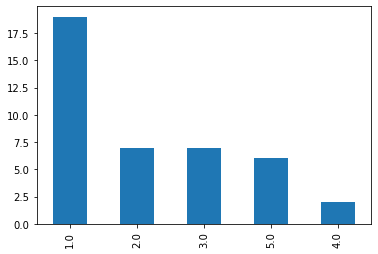

In [3]:
# Frequency Distributions
sale.Achronim.value_counts().plot.bar()

# Collaborative Filtering, User-based filtering 
(TowardsDataScience [Example](https://towardsdatascience.com/build-a-user-based-collaborative-filtering-recommendation-engine-for-anime-92d35921f304))

## Data Cleaning

In [4]:
# Replace NAs with 0's so below function works
sale = sale.fillna(0)

In [5]:
# Removing decimal points and replacing comma separated values with higher value
for i in sale.columns:
    sale[i] = sale[i].apply(str)
sale = sale.replace({'0.0': '0', '1.0': '1', '2.0': '2', '3.0': '3', '4.0': '4', '5.0': '5'})
for i in sale:
    sale[i] = sale[i].astype(str).str[-1:]

In [6]:
# Drop the UserID column and just use the index
sale = sale.drop(columns = 'UserID')

## Recommender System

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
import operator
def similar_users(user_id, matrix, k=3):
    # Subtracting one to get the index from the user_id
    user_id = user_id - 1
    
    # create a df of just the current user
    user = matrix[matrix.index == user_id]
    
    # and a df of all other users
    other_users = matrix[matrix.index != user_id]
    
    # calc cosine similarity between user and each other user
    similarities = cosine_similarity(user,other_users)[0].tolist()
    
    # create list of indices of these users
    indices = other_users.index.tolist()
    
    # create key/values pairs of user index and their similarity
    index_similarity = dict(zip(indices, similarities))
    
    # sort by similarity
    index_similarity_sorted = sorted(index_similarity.items(), key=operator.itemgetter(1))
    index_similarity_sorted.reverse()
    
    # grab k users off the top
    top_users_similarities = index_similarity_sorted[:k]
    users = [u[0] for u in top_users_similarities]
    
    return users
    
similar_user_indices = similar_users(40, sale)
print(similar_user_indices)

[50, 324, 255]


In [8]:
def recommend_item(user_index, similar_user_indices, matrix, items=5):
    
    # load vectors for similar users
    similar_users = matrix[matrix.index.isin(similar_user_indices)]
    # calc avg ratings across the 3 similar users
    similar_users = similar_users.mean(axis=0)
    # convert to dataframe so its easy to sort and filter
    similar_users_df = pd.DataFrame(similar_users, columns=['mean'])
    
    
    # load vector for the current user
    user_df = matrix[matrix.index == user_index]
    # transpose it so its easier to filter
    user_df_transposed = user_df.transpose()
    # rename the column as 'rating'
    user_df_transposed.columns = ['rating']
    # remove any rows without a 0 value. Genre not read yet
    user_df_transposed = user_df_transposed[user_df_transposed['rating']==0]
    # generate a list of genres the user has not read
    genres_unseen = user_df_transposed.index.tolist()
    
    # filter avg ratings of similar users for only genres the current user has not read
    similar_users_df_filtered = similar_users_df[similar_users_df.index.isin(genres_unseen)]
    # order the dataframe
    similar_users_df_ordered = similar_users_df.sort_values(by=['mean'], ascending=False)
    # grab the top n genres   
    top_n_genres = similar_users_df_ordered.head(items)
    top_n_genres_indices = top_n_genres.index.tolist()
    
    #return genres
    return top_n_genres_indices

recommend_item(40, similar_user_indices, sale)

['Eng. Mussar & Machshava', 'Tefillah', 'Achronim', 'Judaica', 'Siddurim']

In [9]:
# Combining functions into one recommender system
def recommender(user_id, matrix, k = 3, items = 5):
    similar_user_indices = similar_users(user_id, matrix, k)
    return(recommend_item(user_id, similar_user_indices, matrix, items))

recommender(40, sale)

['Eng. Mussar & Machshava', 'Tefillah', 'Achronim', 'Judaica', 'Siddurim']

In [10]:
recommender(222, sale, k = 5, items = 9)

['Eng. Mussar & Machshava',
 'English Halacha',
 'Yeshiva University',
 'Heb. Mussar & Machshava',
 'Tefillah',
 "Shailot u'Teshuvot",
 'English Tanach',
 'Gemara',
 'Reference']

In [11]:
recommender(123, sale, k=10, items = 10)

['Yeshiva University',
 'Rishonim',
 'Eng. Mussar & Machshava',
 'Hebrew Halacha',
 'Scholarly Works',
 'Cookbooks',
 'English Tanach',
 'Heb. Mussar & Machshava',
 'Achronim',
 'History']

# Content Based Recommender
(DataCamp [Example]('https://www.datacamp.com/community/tutorials/recommender-systems-python'))

In [12]:
# Pip install the Wikipedia module
!pip install wikipedia

In [13]:
# Getting the Wikipedia summaries for the genres
import wikipedia
achronim_summary = wikipedia.summary("Acharonim")
biography_summary = wikipedia.summary("Biography")
chassidus_summary = wikipedia.summary("Hasidic philosophy")
childrens_summary = wikipedia.summary("Children's literature")
cookbooks_summary = wikipedia.summary("Cookbook")
english_halacha_summary = wikipedia.summary("Halakha")
english_mussar_and_machshava_summary = wikipedia.summary("Musar literature")
english_tanach_summary = wikipedia.summary("Hebrew Bible")
gemara_summary = wikipedia.summary("Gemara")
haggada_summary = wikipedia.summary("Haggadah")
hebrew_halacha_summary = wikipedia.summary("Halakha")
hebrew_mussar_and_machshava_summary = wikipedia.summary("Musar literature")
hebrew_tanach_summary = wikipedia.summary("Hebrew Bible")
history_summary = wikipedia.summary("History")
judaica_summary = wikipedia.summary("Jewish ceremonial art")
midrashim_summary = wikipedia.summary("Midrash")
mishna_summary = wikipedia.summary("Mishnah")
music_summary = wikipedia.summary("Jewish music")
novels_summary = wikipedia.summary("Jewish American literature")
reference_summary = wikipedia.summary("Reference work")
rishonim_summary = wikipedia.summary("Rishonim")
scholarly_works_summary = wikipedia.summary("Scholarly communication")
shailot_uteshuvot_summary = wikipedia.summary("History of responsa in Judaism")
siddurim_summary = wikipedia.summary("Siddur")
tefillah_summary = wikipedia.summary("Jewish prayer")
yeshiva_university_summary = wikipedia.summary("Yeshiva University")

In [14]:
# Adding the descriptions to the dataframe
descriptions = {'Achronim': achronim_summary, 'Biography': biography_summary, 'Chassidus': chassidus_summary,
               "Children's": childrens_summary, 'Cookbooks': cookbooks_summary,
                'English Halacha': english_halacha_summary,
                'Eng. Mussar & Machshava': english_mussar_and_machshava_summary,
                'English Tanach': english_tanach_summary, 'Gemara': gemara_summary, 'Haggada': haggada_summary,
               'Hebrew Halacha': hebrew_halacha_summary,
                'Heb. Mussar & Machshava': hebrew_mussar_and_machshava_summary,
               'Hebrew Tanach': hebrew_tanach_summary, 'History': history_summary, 'Judaica': judaica_summary,
               'Midrashim': midrashim_summary, 'Mishna': mishna_summary, 'Music': music_summary,
                'Novels': novels_summary, 'Reference': reference_summary, 'Rishonim': rishonim_summary,
               'Scholarly Works': scholarly_works_summary, "Shailot u'Teshuvot": shailot_uteshuvot_summary,
               'Siddurim': siddurim_summary, 'Tefillah': tefillah_summary,
                'Yeshiva University': yeshiva_university_summary}

sale_with_descriptions = sale.append(descriptions, ignore_index = True)
sale_with_descriptions.iloc[[335]]

,Achronim,Biography,Chassidus,Children's,Cookbooks,English Halacha,Eng. Mussar & Machshava,English Tanach,Gemara,Haggada,...,Mishna,Music,Novels,Reference,Rishonim,Scholarly Works,Shailot u'Teshuvot,Siddurim,Tefillah,Yeshiva University
335,Acharonim (Hebrew: [(ʔ)aχ(a)ʁoˈnim]; Hebrew: א...,"Geography (from Greek: γεωγραφία, geographia, ...",Hasidic philosophy or Hasidism (Hebrew: חסידות...,Children's literature or juvenile literature i...,A cookbook or cookery book is a kitchen refere...,"Halakha (; Hebrew: הֲלָכָה, Sephardic: [halaˈχ...",Musar literature is didactic Jewish ethical li...,The Hebrew Bible or Tanakh (; Hebrew: תַּנַ״ךְ...,"The Gemara (also transliterated Gemarah, or in...","Haganah (Hebrew: הַהֲגָנָה, lit. The Defence) ...",...,"The Mishnah or the Mishna (; Hebrew: מִשְׁנָה,...",Jewish music is the music and melodies of the ...,Jewish American literature holds an essential ...,"A reference work is a work, such as a book or ...",Rishonim (Hebrew: [ʁiʃoˈnim]; Hebrew: ראשונים‎...,"Scholarly communication involves the creation,...",The history of responsa in Judaism (Hebrew: שא...,"Siddur (Hebrew: סִדּוּר [siˈduʁ], ['sɪdəʁ]; pl...","Jewish prayer (Hebrew: תְּפִלָּה, tefillah [tf...",Yeshiva University is a private research unive...


In [15]:
# Turning descriptions into a column
sale_transposed = sale_with_descriptions.T
sale_transposed.rename({335: 'Descriptions'}, axis=1, inplace=True)
sale_transposed.head(10)

,0,1,2,3,4,5,6,7,8,9,...,326,327,328,329,330,331,332,333,334,Descriptions
Achronim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,4,0,0,Acharonim (Hebrew: [(ʔ)aχ(a)ʁoˈnim]; Hebrew: א...
Biography,0,0,0,0,0,0,0,1,0,0,...,0,0,5,0,0,0,0,0,0,"Geography (from Greek: γεωγραφία, geographia, ..."
Chassidus,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,1,0,0,Hasidic philosophy or Hasidism (Hebrew: חסידות...
Children's,0,0,0,0,3,0,0,0,0,0,...,0,0,3,0,0,3,0,0,5,Children's literature or juvenile literature i...
Cookbooks,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,1,1,0,0,0,A cookbook or cookery book is a kitchen refere...
English Halacha,0,3,0,0,3,0,0,1,0,0,...,0,1,4,0,2,1,1,0,0,"Halakha (; Hebrew: הֲלָכָה, Sephardic: [halaˈχ..."
Eng. Mussar & Machshava,0,3,2,0,1,0,1,0,3,0,...,0,1,3,0,0,0,0,0,1,Musar literature is didactic Jewish ethical li...
English Tanach,0,2,0,0,2,0,0,0,0,0,...,0,0,0,0,1,1,0,2,0,The Hebrew Bible or Tanakh (; Hebrew: תַּנַ״ךְ...
Gemara,0,0,0,0,5,5,0,0,0,0,...,0,0,5,0,0,0,0,0,0,"The Gemara (also transliterated Gemarah, or in..."
Haggada,2,0,0,0,0,0,0,0,0,0,...,2,0,3,0,1,0,0,1,1,"Haganah (Hebrew: הַהֲגָנָה, lit. The Defence) ..."


In [16]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
sale_transposed.Descriptions = sale_transposed.Descriptions.fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(sale_transposed.Descriptions)

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(26, 1333)

In [17]:
#Array mapping from feature integer indices to feature name.
tfidf.get_feature_names()[100:110]

['array',
 'art',
 'arthur',
 'articles',
 'artifacts',
 'artists',
 'arts',
 'aruch',
 'arukh',
 'arvit']

In [18]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [19]:
cosine_sim.shape

(26, 26)

In [20]:
cosine_sim[1]

array([0.        , 1.        , 0.013542  , 0.00827839, 0.00609234,
       0.01411537, 0.        , 0.00873319, 0.01485135, 0.00644434,
       0.01411537, 0.        , 0.00873319, 0.07790569, 0.01992436,
       0.01126488, 0.02728775, 0.01804419, 0.01085407, 0.00905689,
       0.        , 0.0106041 , 0.01424938, 0.0118073 , 0.00152794,
       0.02053785])

In [21]:
d = {'Descriptions': sale_transposed.Descriptions, 'Genres': sale_transposed.index}
metadata = pd.DataFrame(data=d).reset_index()
metadata = metadata.drop('index', axis = 1)
metadata.head(10)

,Descriptions,Genres
0,Acharonim (Hebrew: [(ʔ)aχ(a)ʁoˈnim]; Hebrew: א...,Achronim
1,"Geography (from Greek: γεωγραφία, geographia, ...",Biography
2,Hasidic philosophy or Hasidism (Hebrew: חסידות...,Chassidus
3,Children's literature or juvenile literature i...,Children's
4,A cookbook or cookery book is a kitchen refere...,Cookbooks
5,"Halakha (; Hebrew: הֲלָכָה, Sephardic: [halaˈχ...",English Halacha
6,Musar literature is didactic Jewish ethical li...,Eng. Mussar & Machshava
7,The Hebrew Bible or Tanakh (; Hebrew: תַּנַ״ךְ...,English Tanach
8,"The Gemara (also transliterated Gemarah, or in...",Gemara
9,"Haganah (Hebrew: הַהֲגָנָה, lit. The Defence) ...",Haggada


In [22]:
#Construct a reverse map of indices and genres
indices = pd.Series(metadata.index, index=metadata['Genres']).drop_duplicates()

In [23]:
indices[:10]

Genres
Achronim                   0
Biography                  1
Chassidus                  2
Children's                 3
Cookbooks                  4
English Halacha            5
Eng. Mussar & Machshava    6
English Tanach             7
Gemara                     8
Haggada                    9
dtype: int64

In [24]:
# Function that takes in genre as input and outputs most similar genres
def get_recommendations(genre, cosine_sim=cosine_sim):
    # Get the index of the genre that matches the genre
    idx = indices[genre]

    # Get the pairwise similarity scores of all genres with that genre
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the genres based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar genres
    sim_scores = sim_scores[1:11]

    # Get the genre indices
    genre_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar genres
    return metadata['Genres'].iloc[genre_indices]

In [25]:
get_recommendations('Gemara')

16                Mishna
19             Reference
15             Midrashim
20              Rishonim
22    Shailot u'Teshuvot
5        English Halacha
10        Hebrew Halacha
7         English Tanach
12         Hebrew Tanach
0               Achronim
Name: Genres, dtype: object

In [26]:
get_recommendations('Rishonim')

0               Achronim
5        English Halacha
10        Hebrew Halacha
22    Shailot u'Teshuvot
15             Midrashim
7         English Tanach
12         Hebrew Tanach
24              Tefillah
18                Novels
8                 Gemara
Name: Genres, dtype: object

# Collaborative Filtering, Item Based Filtering
(TowardsDataScience [Example]('https://towardsdatascience.com/item-based-collaborative-filtering-in-python-91f747200fab'))

In [27]:
st = sale.T
st = st.astype(int)
st.head(10)

,0,1,2,3,4,5,6,7,8,9,...,325,326,327,328,329,330,331,332,333,334
Achronim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,4,0,0
Biography,0,0,0,0,0,0,0,1,0,0,...,0,0,0,5,0,0,0,0,0,0
Chassidus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,1,0,0
Children's,0,0,0,0,3,0,0,0,0,0,...,0,0,0,3,0,0,3,0,0,5
Cookbooks,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,1,1,0,0,0
English Halacha,0,3,0,0,3,0,0,1,0,0,...,5,0,1,4,0,2,1,1,0,0
Eng. Mussar & Machshava,0,3,2,0,1,0,1,0,3,0,...,0,0,1,3,0,0,0,0,0,1
English Tanach,0,2,0,0,2,0,0,0,0,0,...,0,0,0,0,0,1,1,0,2,0
Gemara,0,0,0,0,5,5,0,0,0,0,...,3,0,0,5,0,0,0,0,0,0
Haggada,2,0,0,0,0,0,0,0,0,0,...,0,2,0,3,0,1,0,0,1,1


In [28]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(st.values)
distances, indices = knn.kneighbors(st.values, n_neighbors=3)

In [29]:
# get the index for 'Achronim'
index_for_genre = st.index.tolist().index('Achronim')
# find the indices for the similar genres
sim_genres = indices[index_for_genre].tolist()
# distances between 'Achronim' and the similar genres
genre_distances = distances[index_for_genre].tolist()
# the position of 'Achronim' in the list sim_genres
id_genre = sim_genres.index(index_for_genre)
# remove 'Achronim' from the list sim_genres
sim_genres.remove(index_for_genre)
# remove 'Achronim' from the list genre_distances
genre_distances.pop(id_genre)
print('The Nearest Genres to Achronim:', sim_genres)
print('The Distance from Achronim:', genre_distances)

The Nearest Genres to Achronim: [22, 20]
The Distance from Achronim: [0.6071413746099253, 0.6201880560721352]


In [30]:
df1 = st.copy()

In [31]:
def recommend_genres(user, num_recommended_genres):

  print('The list of the Genres {} Has Read \n'.format(user))

  for m in st[st[user] > 0][user].index.tolist():
    print(m)
  
  print('\n')

  recommended_genres = []

  for m in st[st[user] == 0].index.tolist():

    index_df = st.index.tolist().index(m)
    predicted_rating = df1.iloc[index_df, df1.columns.tolist().index(user)]
    recommended_genres.append((m, predicted_rating))

  sorted_rm = sorted(recommended_genres, key=lambda x:x[1], reverse=True)
  
  print('The list of the Recommended Genres \n')
  rank = 1
  for recommended_genre in sorted_rm[:num_recommended_genres]:
    
    print('{}: {} - predicted rating:{}'.format(rank, recommended_genre[0], recommended_genre[1]))
    rank = rank + 1

In [32]:
# store the original dataset in 'df', and create the copy of df, df1 = df.copy().
def genre_recommender(user, num_neighbors, num_recommendation):
  
  number_neighbors = num_neighbors

  knn = NearestNeighbors(metric='cosine', algorithm='brute')
  knn.fit(st.values)
  distances, indices = knn.kneighbors(st.values, n_neighbors=number_neighbors)

  user_index = st.columns.tolist().index(user)

  for m,t in list(enumerate(st.index)):
    if st.iloc[m, user_index] == 0:
      sim_genres = indices[m].tolist()
      genre_distances = distances[m].tolist()
    
      if m in sim_genres:
        id_genre = sim_genres.index(m)
        sim_genres.remove(m)
        genre_distances.pop(id_genre) 

      else:
        sim_genres = sim_genres[:n_neighbors-1]
        genre_distances = genre_distances[:n_neighbors-1]
           
      genre_similarity = [1-x for x in genre_distances]
      genre_similarity_copy = genre_similarity.copy()
      nominator = 0

      for s in range(0, len(genre_similarity)):
        if st.iloc[sim_genres[s], user_index] == 0:
          if len(genre_similarity_copy) == (number_neighbors - 1):
            genre_similarity_copy.pop(s)
          
          else:
            genre_similarity_copy.pop(s-(len(genre_similarity)-len(genre_similarity_copy)))
            
        else:
          nominator = nominator + genre_similarity[s]*st.iloc[sim_genres[s],user_index]
          
      if len(genre_similarity_copy) > 0:
        if sum(genre_similarity_copy) > 0:
          predicted_r = nominator/sum(genre_similarity_copy)
        
        else:
          predicted_r = 0

      else:
        predicted_r = 0
        
      df1.iloc[m,user_index] = predicted_r
  recommend_genres(user, num_recommendation)

In [33]:
genre_recommender(4, 3, 4)

The list of the Genres 4 Has Read 

Children's
English Halacha
Eng. Mussar & Machshava
English Tanach
Gemara
Yeshiva University


The list of the Recommended Genres 

1: Music - predicted rating:3.0
2: Haggada - predicted rating:2.9999999999999996
3: Judaica - predicted rating:2.4675652385932936
4: Cookbooks - predicted rating:1.0


In [34]:
genre_recommender(10, 7, 6)

The list of the Genres 10 Has Read 

Rishonim


The list of the Recommended Genres 

1: Achronim - predicted rating:1.0
2: Biography - predicted rating:1.0
3: Hebrew Halacha - predicted rating:1.0
4: Reference - predicted rating:1.0
5: Shailot u'Teshuvot - predicted rating:1.0
6: Chassidus - predicted rating:0.0


# Comparison
## MAE
(See LinkedIn Learning [video]('https://www.linkedin.com/learning/building-recommender-systems-with-machine-learning-and-ai/walkthrough-of-recommendermetrics-py?autoplay=true&resume=false&u=93965642'))

In [35]:
# Pip install the surprise module
!pip install surprise

In [36]:
# Creating the dataset in a way that the surprise library can understand
mae_df = st.reset_index().rename(columns = {'index' : 'Genre'})
mae_df = mae_df.melt(id_vars = 'Genre', var_name = 'User', value_name = 'Rating')
mae_df.head(10)

,Genre,User,Rating
0,Achronim,0,0
1,Biography,0,0
2,Chassidus,0,0
3,Children's,0,0
4,Cookbooks,0,0
5,English Halacha,0,0
6,Eng. Mussar & Machshava,0,0
7,English Tanach,0,0
8,Gemara,0,0
9,Haggada,0,2


In [37]:
# Loading the dataset and transforming it into a surprise dataset
from surprise import Dataset
from surprise import Reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(mae_df[['Genre', 'User', 'Rating']], reader)

In [38]:
# Computing RMSE and MAE with cross validation for a user based recommender system
from surprise import KNNBasic
from surprise.model_selection import cross_validate
sim_options = {'name': 'cosine'}
algo = KNNBasic(sim_options=sim_options)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


/Users/benjaminfreund/opt/anaconda3/lib/python3.8/site-packages/surprise/prediction_algorithms/algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0626  1.0771  1.0875  1.0757  0.0102  
MAE (testset)     0.9854  0.9910  0.9939  0.9901  0.0035  
Fit time          0.01    0.00    0.01    0.01    0.00    
Test time         0.10    0.11    0.13    0.11    0.01    


{'test_rmse': array([1.06263532, 1.07710761, 1.08750298]),
 'test_mae': array([0.98540191, 0.99103787, 0.99393263]),
 'fit_time': (0.0074498653411865234,
  0.004113912582397461,
  0.0055010318756103516),
 'test_time': (0.10327911376953125, 0.10721707344055176, 0.13257694244384766)}

In [39]:
# Computing RMSE and MAE with cross validation for an item based recommender system
sim_options2 = {'name': 'cosine',
               'user_based': False
               }
algo2 = KNNBasic(sim_options=sim_options2)
cv_results2 = cross_validate(algo2, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print(sum(cv_results2['test_mae'])/len(cv_results2['test_mae']))

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.1090  1.0996  1.0754  1.0947  0.0141  
MAE (testset)     1.0029  1.0070  0.9887  0.9995  0.0079  
Fit time          0.16    0.17    0.15    0.16    0.01    
Test time         0.71    0.54    0.54    0.60    0.08    
0.9995149022960971


Lower MAE & RMSE are better ([source]('http://www.eumetrain.org/data/4/451/english/msg/ver_cont_var/uos3/uos3_ko1.htm')). Therefore, the user based recommender is slightly better than the two item based recommenders.

In [40]:
# Creating the final_recommender function
def final_recommender(data, cf_user_dataset = sale, cb_dataset = sale_transposed, cf_item_dataset = st, user_id = 1, genre = 'Achronim'):
    # Optional datasets are for the respective recommenders
    # Optional user_id is for Collaborative Filtering recommenders
    # Optional genre is for Content Based recommender
    # Must have dataset that follows surprise dataset model
    from surprise import Dataset
    from surprise import Reader
    from surprise.model_selection import cross_validate
    from surprise import KNNBasic
    sim_options = {'name': 'cosine'}
    algo = KNNBasic(sim_options = sim_options)
    cv_results = cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv = 3, verbose = True)
    mean_mae_user = sum(cv_results['test_mae'])/len(cv_results['test_mae'])
    sim_options2 = {'name': 'cosine', 'user_based': False}
    algo2 = KNNBasic(sim_options = sim_options2)
    cv_results2 = cross_validate(algo2, data, measures = ['RMSE', 'MAE'], cv = 3, verbose = True)
    mean_mae_item = sum(cv_results2['test_mae'])/len(cv_results2['test_mae'])
    if mean_mae_user < mean_mae_item:
        # Collaborative Filtering, User Based
        return(recommender(user_id, cf_user_dataset, k = 3, items = 5))
    else:
        random_value = random.randint(0, 1)
        if random_value == 0:
            # Content Based
            return(get_recommendations(genre))
        else:
            # Collaborative Filtering, Item Based
            return(genre_recommender(user_id, 3, 5))

In [41]:
final_recommender(data)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.1019  1.0537  1.0790  1.0782  0.0197  
MAE (testset)     1.0006  0.9828  0.9924  0.9920  0.0073  
Fit time          0.01    0.00    0.01    0.01    0.00    
Test time         0.12    0.09    0.11    0.11    0.01    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0953  1.0811  1.0838  1.0867  0.0062  
MAE (testset)

['Haggada', 'Achronim', 'Judaica', 'Tefillah', 'Siddurim']